<a href="https://colab.research.google.com/github/antra111/Titanic-Survival-Predictions-ML/blob/main/Titanic_Survival_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TITANIC SURVIVAL USING ML**

**Collection of dataset**

In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

**Data Collection**

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
data=pd.read_csv('/content/drive/MyDrive/Antra/Projects/titanic_train.csv')

In [7]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


**Exploring Dataset**

In [8]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Data Cleaning**

In [9]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

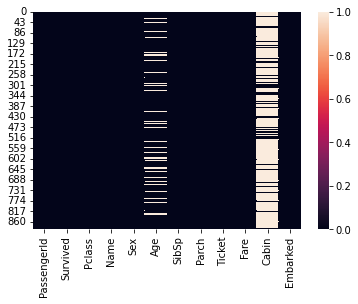

In [10]:
sns.heatmap(data.isnull())

In [11]:
data.drop(['Cabin'],axis=1,inplace=True)

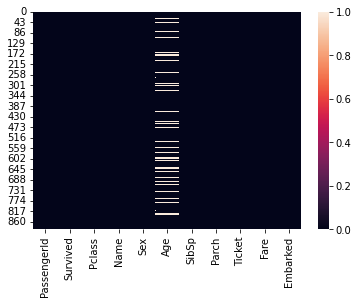

In [12]:
sns.heatmap(data.isnull())

In [13]:
data1=data.dropna()

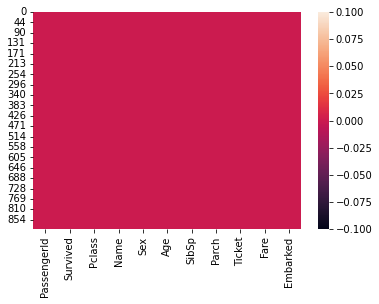

In [15]:
sns.heatmap(data1.isnull())

In [16]:
data1.head(n=0)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


**Data Visualisation**

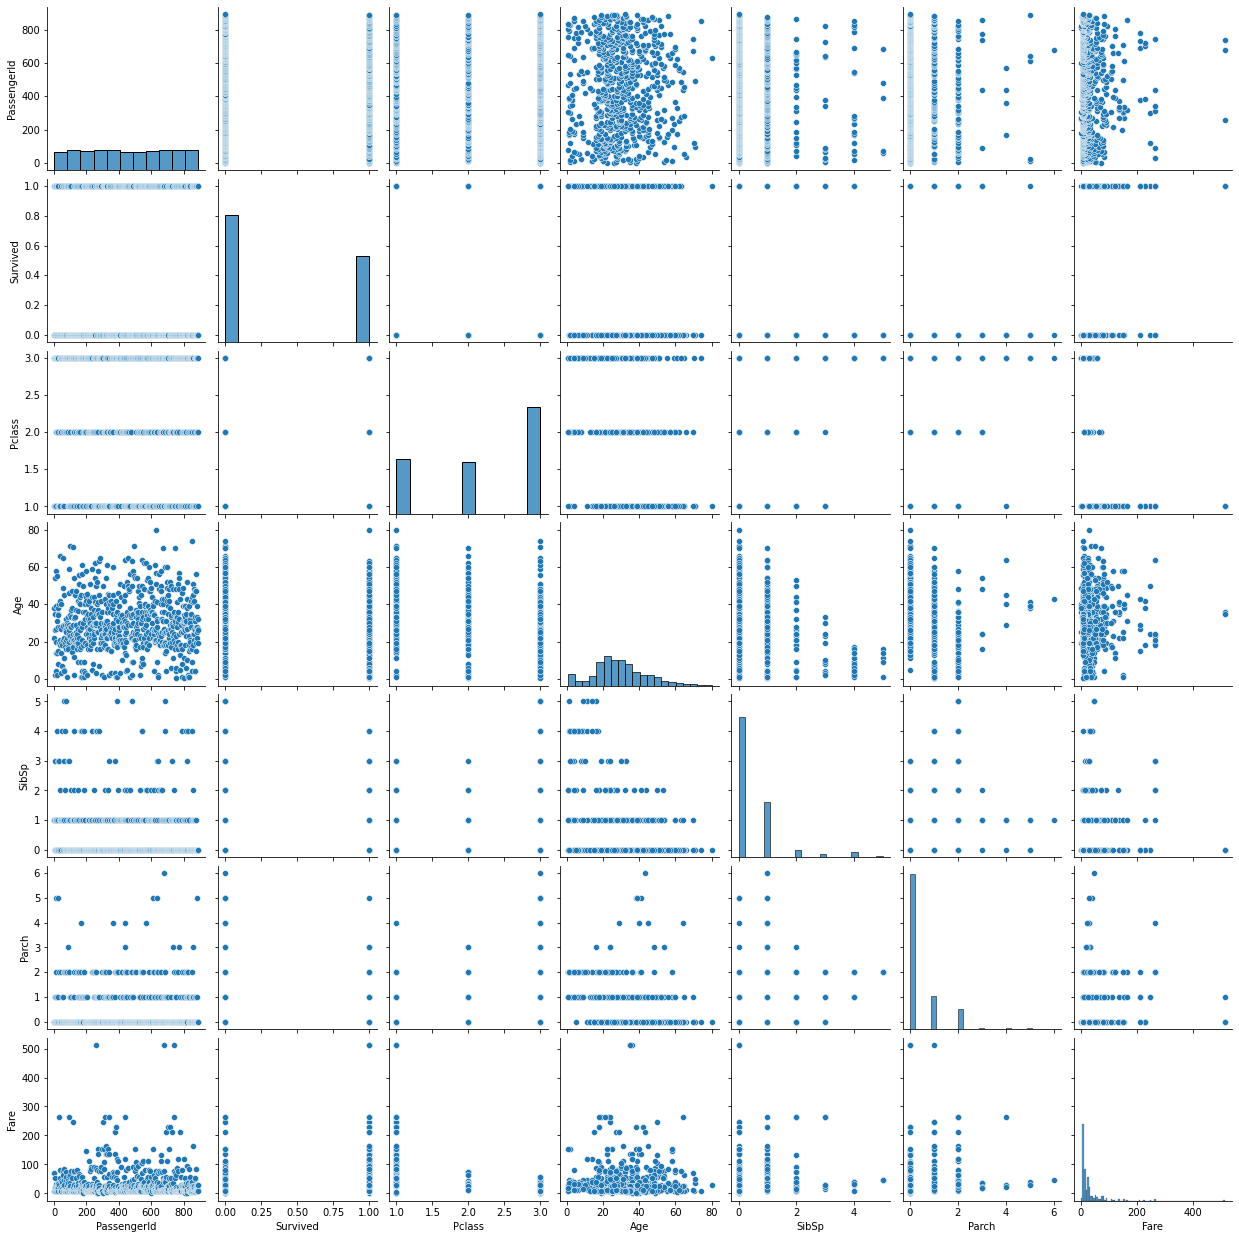

In [17]:
sns.pairplot(data1)

**Selection of independent and dependent data**

In [19]:
X=data1[['Pclass','Age','SibSp','Parch']]

In [20]:
X.head(n=2)

,Pclass,Age,SibSp,Parch
0,3,22.0,1,0
1,1,38.0,1,0


In [21]:
Y=data1[['Survived']]

In [22]:
Y.head(n=2)

,Survived
0,0
1,1


**Spliting Data**

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.004,random_state=0)

In [25]:
Y_test

,Survived
423,0
178,0
305,1


**Model Selection**

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
XYZ=LogisticRegression()

In [28]:
XYZ.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [32]:
print(X_test)

     Pclass    Age  SibSp  Parch
423       3  28.00      1      1
178       2  30.00      0      0
305       1   0.92      1      2


In [33]:
print(Y_test)

     Survived
423         0
178         0
305         1


In [35]:
y_pred=XYZ.predict(X_test)

In [36]:
print(X_test)

     Pclass    Age  SibSp  Parch
423       3  28.00      1      1
178       2  30.00      0      0
305       1   0.92      1      2


In [34]:
print(y_pred)

[0 0 1]


In [31]:
print(Y_test)

,Survived
423,0
178,0
305,1


**Model Evaluation**

In [37]:
from sklearn.metrics import r2_score

In [38]:
print('MY MODEL ACCURRACY IS: ',r2_score(Y_test,y_pred)*100)

MY MODEL ACCURRACY IS:  100.0


**Model Predictions**

In [42]:
id=[1]
df1=pd.DataFrame({'Pclass':2,'Age':40.0,'SibSp':1,'Parch':0},index=id)

In [43]:
df1

,Pclass,Age,SibSp,Parch
1,2,40.0,1,0


In [44]:
new_pred=XYZ.predict(df1)
if new_pred==1:
  print("The passenger has survived.")
else:
  print("The passenger has not survived.")

The passenger has not survived.


In [45]:
print(new_pred)

[0]
